
✅ Processed data shape: (40, 200)
✅ Labels shape: (40,)
✅ Sample classes: ['Circumferential Crack' 'Gasket Leak' 'Longitudinal Crack' 'No-leak'
 'Orifice Leak']


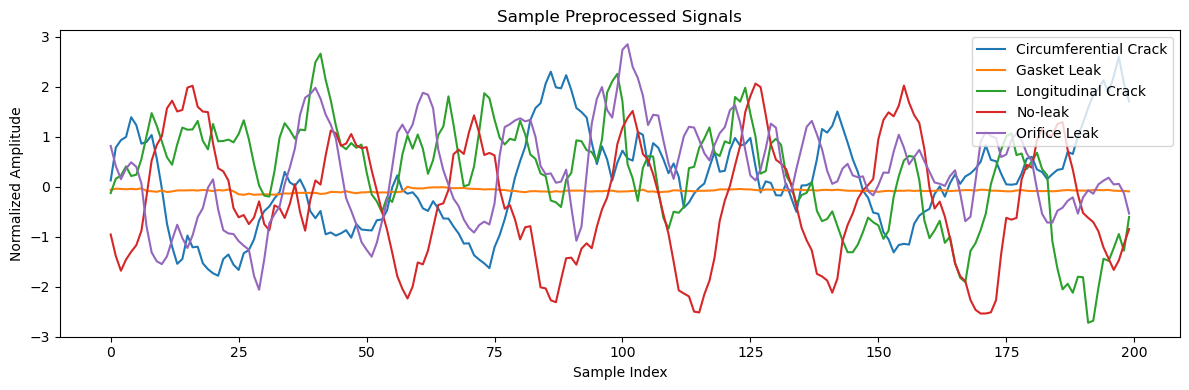

In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set base path
base_path = '../data/raw/Accelerometer/Looped'
leak_classes = ['Circumferential Crack', 'Gasket Leak', 'Longitudinal Crack', 'No-leak', 'Orifice Leak']

# Parameters
samples_to_keep = 200  # Truncate or pad to this length
samples_to_plot_per_class = 1  # For cleaner visualization

# Storage
all_data = []
all_labels = []
plot_data = []
plot_labels = []

# Process each class
for leak_type in leak_classes:
    class_path = os.path.join(base_path, leak_type)
    plotted = 0  # Counter for plotting samples
    for file in os.listdir(class_path):
        if file.endswith('.csv'):
            file_path = os.path.join(class_path, file)
            try:
                df = pd.read_csv(file_path)
                signal = df['Value'].values

                # Normalize signal
                signal = (signal - np.mean(signal)) / np.std(signal)

                # Truncate or pad
                if len(signal) > samples_to_keep:
                    signal = signal[:samples_to_keep]
                else:
                    signal = np.pad(signal, (0, samples_to_keep - len(signal)))

                all_data.append(signal)
                all_labels.append(leak_type)

                # Save some samples for plotting
                if plotted < samples_to_plot_per_class:
                    plot_data.append(signal)
                    plot_labels.append(leak_type)
                    plotted += 1

            except Exception as e:
                print(f"Error reading {file_path}: {e}")

# Convert to NumPy arrays
X = np.array(all_data)
y = np.array(all_labels)

print(f"\n✅ Processed data shape: {X.shape}")
print(f"✅ Labels shape: {y.shape}")
print("✅ Sample classes:", np.unique(y))

# Save for training later
os.makedirs('../data/processed', exist_ok=True)
np.save('../data/processed/X_accelerometer_looped.npy', X)
np.save('../data/processed/y_accelerometer_looped.npy', y)

# ===============================
# 📊 Quick visualization
# ===============================
plt.figure(figsize=(12, 4))

for i in range(len(plot_data)):
    plt.plot(plot_data[i], label=plot_labels[i])

# Remove duplicate labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.title("Sample Preprocessed Signals")
plt.xlabel("Sample Index")
plt.ylabel("Normalized Amplitude")
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example CSV file path (modify as needed)
file_path = '../data/raw/Accelerometer/Looped/Circumferential Crack/LO_CC_0.47 LPS_A1.csv'

# Read the file
df = pd.read_csv(file_path)

# Display basic info
print("📄 Columns:", df.columns.tolist())
print("📏 Shape:", df.shape)
print(df.head())


📄 Columns: ['Sample', 'Value']
📏 Shape: (918870, 2)
     Sample     Value
0  0.000000  0.000448
1  0.000039  0.000738
2  0.000078  0.000854
3  0.000117  0.000776
4  0.000156  0.001063


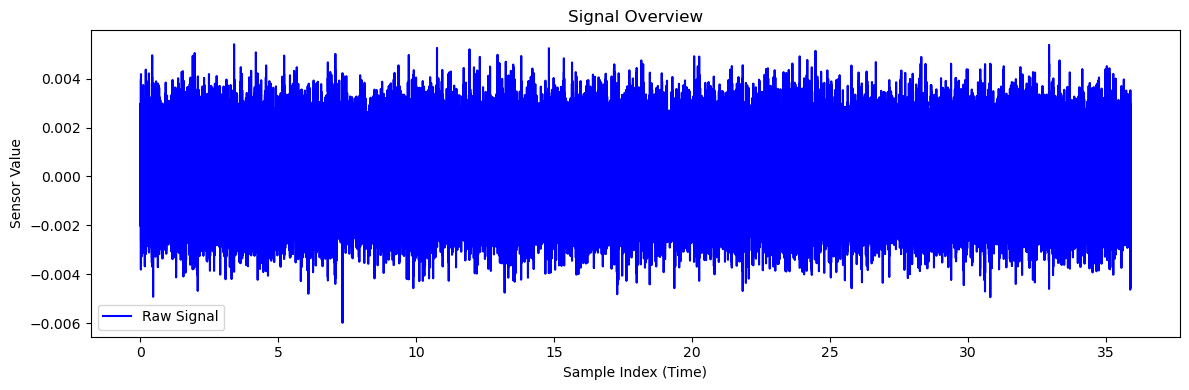

In [22]:
plt.figure(figsize=(12, 4))
plt.plot(df['Sample'], df['Value'], label='Raw Signal', color='blue')
plt.xlabel('Sample Index (Time)')
plt.ylabel('Sensor Value')
plt.title('Signal Overview')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
print("\n📊 Statistical Summary of Signal Values:")
print(df['Value'].describe())



📊 Statistical Summary of Signal Values:
count    933164.000000
mean          0.001208
std           0.002029
min          -0.004273
25%          -0.000391
50%           0.001390
75%           0.002845
max           0.006751
Name: Value, dtype: float64


In [23]:
missing_values = df.isnull().sum()
print("\n❗ Missing Values:")
print(missing_values)



❗ Missing Values:
Sample    0
Value     0
dtype: int64


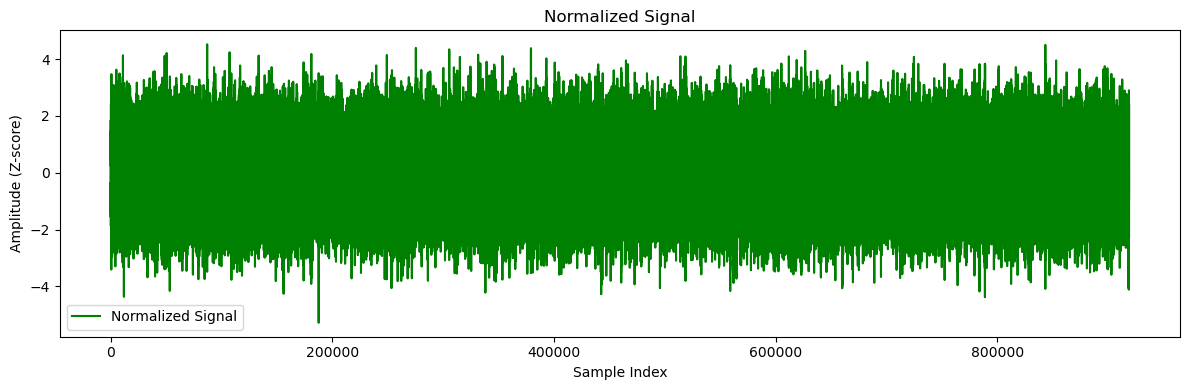

In [24]:
signal = df['Value'].values
normalized = (signal - np.mean(signal)) / np.std(signal)

# Optional: plot normalized signal
plt.figure(figsize=(12, 4))
plt.plot(normalized, label='Normalized Signal', color='green')
plt.title('Normalized Signal')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude (Z-score)')
plt.legend()
plt.tight_layout()
plt.show()


In [25]:
label = 'Circumferential Crack'  # or parse from the file path
print("✅ Assigned Label:", label)


✅ Assigned Label: Circumferential Crack


✅ Sample Count Per Class:
  Circumferential Crack: 8 samples
  Gasket Leak: 8 samples
  Longitudinal Crack: 8 samples
  No-leak: 8 samples
  Orifice Leak: 8 samples

📊 Total Samples: 40

📉 Summary Stats Per Class:

--- Circumferential Crack ---
count    7.438493e+06
mean     3.808384e-04
std      1.569664e-03
min     -5.984425e-03
25%     -4.248240e-04
50%      3.009290e-04
75%      1.246940e-03
max      6.750736e-03
dtype: float64

--- Gasket Leak ---
count    7.449668e+06
mean     3.236240e-04
std      2.692746e-03
min     -2.491396e-02
25%     -5.774580e-04
50%      1.559320e-04
75%      1.457295e-03
max      4.462438e-02
dtype: float64

--- Longitudinal Crack ---
count    7.510425e+06
mean     2.661414e-04
std      1.484983e-03
min     -6.837634e-03
25%     -3.919420e-04
50%      2.610900e-04
75%      9.936070e-04
max      6.503617e-03
dtype: float64

--- No-leak ---
count    7.333021e+06
mean    -1.212112e-04
std      7.192049e-03
min     -2.263872e-01
25%     -2.157015e-03
50%   

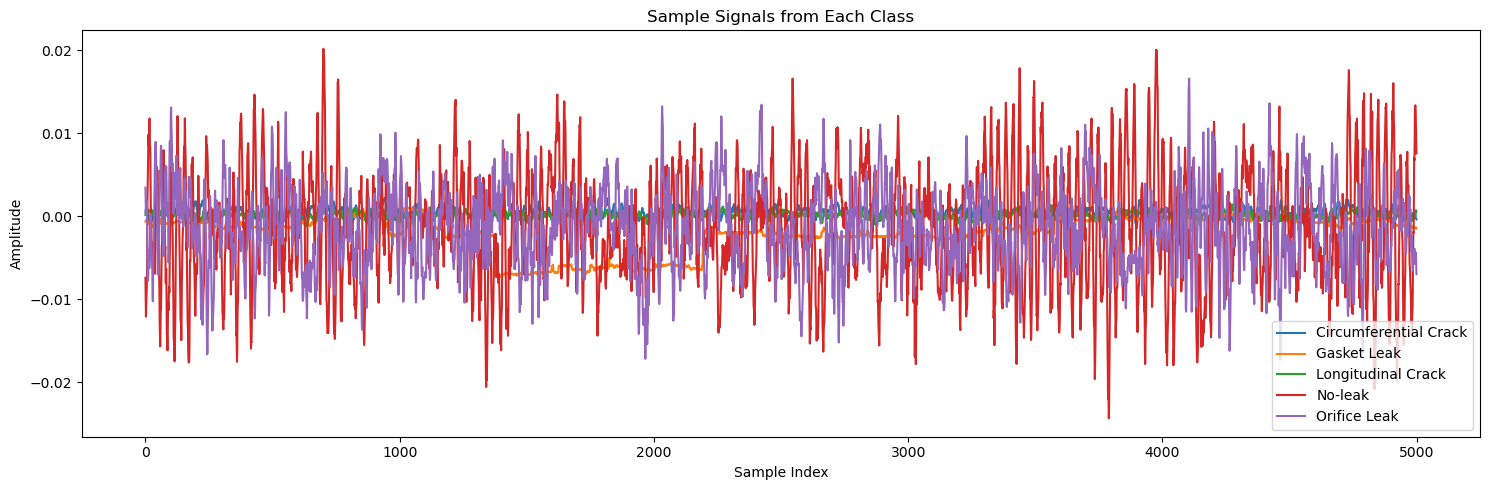

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Define the base path
base_path = r"E:\Upwork Project\AI_Leak_Detection_Project\data\raw\Accelerometer\Looped"

# Leak class folders
leak_classes = ['Circumferential Crack', 'Gasket Leak', 'Longitudinal Crack', 'No-leak', 'Orifice Leak']

# For storing stats
class_sample_count = {}
missing_values_check = {}
summary_stats = {}

# For plotting one sample from each class
sample_signals = {}

for leak_class in leak_classes:
    class_path = os.path.join(base_path, leak_class)
    files = [f for f in os.listdir(class_path) if f.endswith('.csv')]
    class_sample_count[leak_class] = len(files)
    
    all_values = []
    for i, file in enumerate(files):
        file_path = os.path.join(class_path, file)
        df = pd.read_csv(file_path)

        # Check for missing values
        missing = df.isnull().sum()
        missing_values_check[file] = missing

        # Collect values for stats
        all_values.extend(df['Value'].values)

        # Save a signal for plotting (just first file)
        if i == 0:
            sample_signals[leak_class] = df['Value'].values

    # Compute statistics for current class
    all_values = pd.Series(all_values)
    summary_stats[leak_class] = all_values.describe()

# --- Print Results ---

print("✅ Sample Count Per Class:")
for cls, count in class_sample_count.items():
    print(f"  {cls}: {count} samples")

total = sum(class_sample_count.values())
print(f"\n📊 Total Samples: {total}")

print("\n📉 Summary Stats Per Class:")
for cls, stats in summary_stats.items():
    print(f"\n--- {cls} ---\n{stats}")

print("\n❗ Missing Value Check (if any):")
for file, missing in missing_values_check.items():
    if missing['Value'] > 0:
        print(f"{file} has missing values: {missing.to_dict()}")

# --- Plot Example Signals from Each Class ---

plt.figure(figsize=(15, 5))
for cls, signal in sample_signals.items():
    plt.plot(signal[:5000], label=cls)  # plot first 5000 samples for clarity
plt.title("Sample Signals from Each Class")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.legend()
plt.tight_layout()
plt.show()


In [31]:
import pandas as pd

# Path to any one CSV file
file_path = r"E:\Upwork Project\AI_Leak_Detection_Project\data\raw\Accelerometer\Looped\Circumferential Crack\LO_CC_0.18 LPS_A1.csv"

# Load CSV
df = pd.read_csv(file_path)

# Basic Info
num_rows = df.shape[0]
start_time = df['Sample'].iloc[0]
end_time = df['Sample'].iloc[-1]
duration_sec = end_time - start_time

# Estimate Sampling Rate (assuming uniform sampling)
sampling_interval = df['Sample'].iloc[1] - df['Sample'].iloc[0]
sampling_rate = round(1 / sampling_interval)

# Display Summary
print(f"📄 File: {file_path}")
print(f"🧾 Number of rows (samples): {num_rows}")
print(f"⏱️ Signal duration: {duration_sec:.2f} seconds")
print(f"⏲️ Sampling rate: {sampling_rate} Hz")
print(f"🧮 Sample interval: {sampling_interval:.8f} sec")
print(f"📉 Value range: min = {df['Value'].min():.6f}, max = {df['Value'].max():.6f}")


📄 File: E:\Upwork Project\AI_Leak_Detection_Project\data\raw\Accelerometer\Looped\Circumferential Crack\LO_CC_0.18 LPS_A1.csv
🧾 Number of rows (samples): 922397
⏱️ Signal duration: 36.03 seconds
⏲️ Sampling rate: 25575 Hz
🧮 Sample interval: 0.00003910 sec
📉 Value range: min = -0.002394, max = 0.003014


In [32]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
from tqdm import tqdm

# Configuration
base_raw_path = r"E:\Upwork Project\AI_Leak_Detection_Project\data\raw"
base_save_path = r"E:\Upwork Project\AI_Leak_Detection_Project\data\processed"
sensor_types = ["Accelerometer", "Dynamic Pressure Sensor"]
topology = "Looped"
leak_classes = ['Circumferential Crack', 'Gasket Leak', 'Longitudinal Crack', 'No-leak', 'Orifice Leak']
target_segments_per_class = 250
segment_length = 5000  # Samples per segment

# Helper to safely normalize
def safe_normalize(signal):
    mean = np.mean(signal)
    std = np.std(signal)
    return (signal - mean) / std if std > 0 else signal - mean

# Main processing
for sensor in sensor_types:
    print(f"\n🔍 Processing Sensor: {sensor}")
    for leak_type in leak_classes:
        input_folder = os.path.join(base_raw_path, sensor, topology, leak_type)
        output_folder = os.path.join(base_save_path, sensor, topology, leak_type)
        Path(output_folder).mkdir(parents=True, exist_ok=True)

        total_segments = 0
        file_count = 0

        if not os.path.exists(input_folder):
            print(f"⚠️ Folder not found: {input_folder}")
            continue

        for file in os.listdir(input_folder):
            if not file.endswith(".csv"):
                continue

            try:
                df = pd.read_csv(os.path.join(input_folder, file))
                if 'Value' not in df.columns:
                    print(f"⚠️ Skipping {file} (missing 'Value' column)")
                    continue

                signal = df['Value'].dropna().values
                signal = safe_normalize(signal)

                # Segment and save
                num_segments = len(signal) // segment_length
                for i in range(num_segments):
                    if total_segments >= target_segments_per_class:
                        break

                    segment = signal[i * segment_length : (i + 1) * segment_length]
                    segment_df = pd.DataFrame({'Value': segment})
                    segment_name = f"{sensor.replace(' ', '')}_{leak_type.replace(' ', '_')}_{total_segments+1:03d}.csv"
                    segment_df.to_csv(os.path.join(output_folder, segment_name), index=False)
                    total_segments += 1

                file_count += 1

            except Exception as e:
                print(f"❌ Error processing {file}: {e}")

        print(f"✅ {leak_type}: {total_segments} segments from {file_count} files saved to {output_folder}")



🔍 Processing Sensor: Accelerometer
✅ Circumferential Crack: 250 segments from 8 files saved to E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Accelerometer\Looped\Circumferential Crack
✅ Gasket Leak: 250 segments from 8 files saved to E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Accelerometer\Looped\Gasket Leak
✅ Longitudinal Crack: 250 segments from 8 files saved to E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Accelerometer\Looped\Longitudinal Crack
✅ No-leak: 250 segments from 8 files saved to E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Accelerometer\Looped\No-leak
✅ Orifice Leak: 250 segments from 8 files saved to E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Accelerometer\Looped\Orifice Leak

🔍 Processing Sensor: Dynamic Pressure Sensor
✅ Circumferential Crack: 250 segments from 8 files saved to E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Dynamic Pressure Sensor\Looped\Circumferential Crack
✅ Gasket

In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from tqdm import tqdm
from matplotlib.colors import LogNorm

# Set source and destination folders
source_root = r"E:\Upwork Project\AI_Leak_Detection_Project\data\processed"
destination_root = r"E:\Upwork Project\AI_Leak_Detection_Project\images\cwt_log"

# Wavelet and scale parameters
wavelet = 'morl'
scales = np.arange(1, 128)  # Can be tuned

# Function to generate and save CWT log-scaled image
def save_cwt_image(signal, save_path):
    coefficients, _ = pywt.cwt(signal, scales, wavelet)
    power = np.abs(coefficients) ** 2
    
    plt.figure(figsize=(2.56, 2.56), dpi=100)  # 256x256 image
    plt.imshow(power, extent=[0, 1, 1, 128], cmap='jet', aspect='auto', norm=LogNorm())
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
    plt.close()

# Loop through all segmented CSV files
for sensor_type in ["Accelerometer", "Dynamic Pressure Sensor"]:
    for condition in ["Circumferential Crack", "Gasket Leak", "Longitudinal Crack", "No-leak", "Orifice Leak"]:
        input_folder = os.path.join(source_root, sensor_type, "Looped", condition)
        output_folder = os.path.join(destination_root, sensor_type, "Looped", condition)
        os.makedirs(output_folder, exist_ok=True)

        print(f"📁 Processing {sensor_type} - {condition}")

        for file in tqdm(os.listdir(input_folder)):
            if file.endswith(".csv"):
                file_path = os.path.join(input_folder, file)
                signal = pd.read_csv(file_path)['Value'].values

                # Normalize the signal
                signal = (signal - np.mean(signal)) / np.std(signal)

                # Save image
                image_name = file.replace('.csv', '.png')
                save_path = os.path.join(output_folder, image_name)
                save_cwt_image(signal, save_path)

print("✅ All CWT Log images generated and saved successfully.")


📁 Processing Accelerometer - Circumferential Crack


100%|██████████| 250/250 [01:06<00:00,  3.74it/s]


📁 Processing Accelerometer - Gasket Leak


100%|██████████| 250/250 [01:06<00:00,  3.78it/s]


📁 Processing Accelerometer - Longitudinal Crack


100%|██████████| 250/250 [01:07<00:00,  3.72it/s]


📁 Processing Accelerometer - No-leak


100%|██████████| 250/250 [01:08<00:00,  3.65it/s]


📁 Processing Accelerometer - Orifice Leak


100%|██████████| 250/250 [01:07<00:00,  3.70it/s]


📁 Processing Dynamic Pressure Sensor - Circumferential Crack


100%|██████████| 250/250 [01:07<00:00,  3.68it/s]


📁 Processing Dynamic Pressure Sensor - Gasket Leak


100%|██████████| 250/250 [01:06<00:00,  3.78it/s]


📁 Processing Dynamic Pressure Sensor - Longitudinal Crack


100%|██████████| 250/250 [01:10<00:00,  3.57it/s]


📁 Processing Dynamic Pressure Sensor - No-leak


100%|██████████| 250/250 [01:14<00:00,  3.35it/s]


📁 Processing Dynamic Pressure Sensor - Orifice Leak


100%|██████████| 250/250 [01:08<00:00,  3.67it/s]

✅ All CWT Log images generated and saved successfully.


In [34]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Paths
base_path = r"E:\Upwork Project\AI_Leak_Detection_Project\data\processed\Accelerometer\Looped"
leak_classes = ['Circumferential Crack', 'Gasket Leak', 'Longitudinal Crack', 'Orifice Leak']
no_leak_class = 'No-leak'

# Prepare data
X = []
y = []

for class_name in os.listdir(base_path):
    class_path = os.path.join(base_path, class_name)
    for file in os.listdir(class_path):
        if file.endswith('.csv'):
            file_path = os.path.join(class_path, file)
            data = pd.read_csv(file_path)
            signal = data['Value'].values
            X.append(signal)
            if class_name == no_leak_class:
                y.append('No-leak')
            else:
                y.append('Leak')

X = np.array(X)
y = np.array(y)

# Encode labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # 0: Leak, 1: No-leak

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [35]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


c:\Users\Muhammad Umar\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 648,449 (2.47 MB)

 Trainable params: 648,449 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

In [36]:
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)


Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7721 - loss: 0.8097 - val_accuracy: 0.7800 - val_loss: 0.6159
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7946 - loss: 0.5644 - val_accuracy: 0.8000 - val_loss: 0.5464
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8598 - loss: 0.3351 - val_accuracy: 0.7800 - val_loss: 0.5830
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9003 - loss: 0.2602 - val_accuracy: 0.8000 - val_loss: 0.6268
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9189 - loss: 0.2453 - val_accuracy: 0.7900 - val_loss: 0.6193
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9354 - loss: 0.1876 - val_accuracy: 0.7950 - val_loss: 0.6530
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9440 - loss: 0.1449 - val_accuracy: 0.7950 - val_loss: 0.6755
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9329 - loss: 0.1737 - val_accuracy: 0.8000 - val_loss

In [37]:
loss, acc = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {acc:.4f}")

# Save model if needed


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7645 - loss: 1.1141 

✅ Test Accuracy: 0.7800


In [38]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop]
)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9860 - loss: 0.0380 - val_accuracy: 0.8000 - val_loss: 1.4170
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9826 - loss: 0.0508 - val_accuracy: 0.8000 - val_loss: 1.3919
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9890 - loss: 0.0293 - val_accuracy: 0.8050 - val_loss: 1.3269
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9836 - loss: 0.0737 - val_accuracy: 0.7750 - val_loss: 1.2661
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9818 - loss: 0.0481 - val_accuracy: 0.8150 - val_loss: 1.2931
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9803 - loss: 0.0591 - val_accuracy: 0.8150 - val_loss: 1.3093
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9874 - loss: 0.0300 - val_accuracy: 0.8050 - val_loss: 1.4384
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9810 - loss: 0.0459 - val_accuracy: 0.8050 - val_loss

In [39]:
from tensorflow.keras import regularizers

model = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],),
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu',
          kernel_regularizer=regularizers.l2(0.001)),
    Dropout(0.4),
    Dense(1, activation='sigmoid')
])


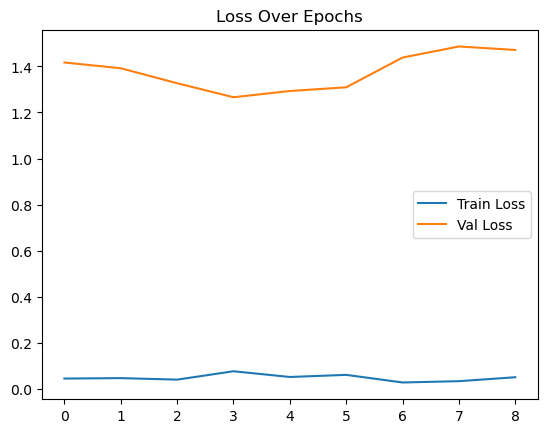

In [40]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss Over Epochs")
plt.show()
